# CPSC5616 Fall

Here's are some simple Python scripts that demonstrates the k-nearest neighbors (KNN) algorithm using the matplotlib library for visualization. In these examples, we'll create scatter plots and contours with classes of data points and use KNN to classify new data points based on their nearest neighbors.

We will try both random generated data and real data.

Libraries: numpy, matplotlib, scikit-learn (sklearn)

Update: ROC Curve and AUC on iris dataset (complete)

*Note: The code base was generated using ChatGPT*

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# K-NN from without using sklearn

Generate random data for two classes:
X[:, 0] and X[:, 1] are slicing the X array to extract the values of the first and second features for all data points.

X[:, 0] + X[:, 1] calculates the sum of the values of the first and second features for each data point. Essentially, it computes a linear combination of the two features for all data points.

X[:, 0] + X[:, 1] > 1 creates a boolean array where each element is True if the sum of the first and second features for the corresponding data point is greater than 1, and False otherwise. This condition effectively defines a decision boundary in feature space.

.astype(int) converts the boolean values (True and False) into integers (1 for True and 0 for False). This is commonly done to represent binary classes, where 1 typically indicates one class (e.g., positive or "yes") and 0 indicates the other class (e.g., negative or "no").

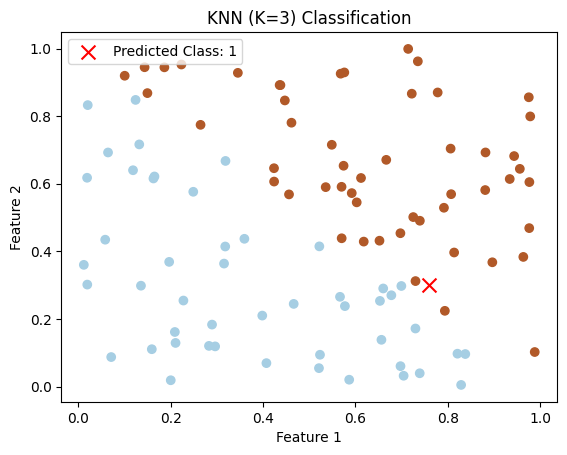

In [ ]:
np.random.seed(0)
X = np.random.rand(100, 2)
# Data labeling
y = (X[:, 0] + X[:, 1] > 1).astype(int)


# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Create a new data point for prediction
new_data_point = np.array([0.76, 0.3])

# Define the number of neighbors (K) for KNN
k = 3

# Function to calculate Euclidean distance between two points
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((point1 - point2) ** 2))

# Function to perform KNN classification
def knn_predict(X_train, y_train, x_new, k):
    distances = []
    for i in range(len(X_train)):
        distance = euclidean_distance(X_train[i], x_new)
        distances.append((distance, y_train[i]))

    distances.sort(key=lambda x: x[0]) # Sort the list of distances in ascending order based on the distance value
    nearest_neighbors = distances[:k] # Select the first 'k' elements from the sorted list (nearest neighbors)
    # Count the occurrences of each class among the nearest neighbors and find the class with the highest count
    counts = np.bincount([neighbor[1] for neighbor in nearest_neighbors])
    return np.argmax(counts) # Return the class label with the highest count as the predicted class

# Predict the class of the new data point
predicted_class = knn_predict(X, y, new_data_point, k)

# Plot the new data point and its predicted class
plt.scatter(new_data_point[0], new_data_point[1], marker='x', s=100, c='red', label=f'Predicted Class: {predicted_class}')

plt.legend()
plt.title(f'KNN (K={k}) Classification')
plt.show()

# K-NN with sklearn
Here's a simple implementation of the k-nearest neighbors (KNN) algorithm with scikit-learn.  In this example, we'll create a KNN classifier and use it to classify a new data point. We'll also visualize the results using matplotlib.

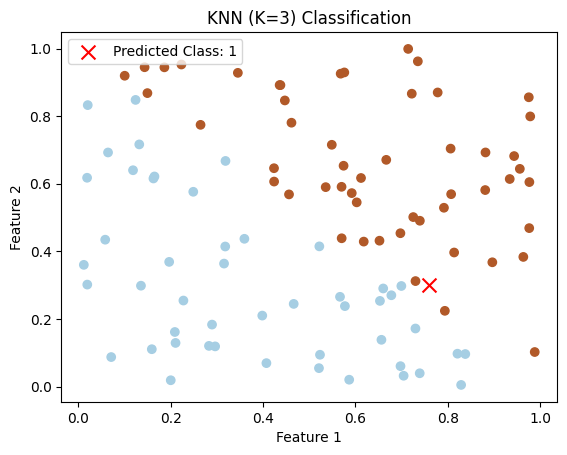

In [ ]:
# Create a scatter plot of the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Create a new data point for prediction
new_data_point = np.array([[0.76, 0.3]])

# Define the number of neighbors (K) for KNN
k = 3

# Create a KNN classifier and fit it to the data
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X, y)

# Predict the class of the new data point
predicted_class = knn.predict(new_data_point)

# Plot the new data point and its predicted class
plt.scatter(new_data_point[:, 0], new_data_point[:, 1], marker='x', s=100, c='red', label=f'Predicted Class: {predicted_class[0]}')

plt.legend()
plt.title(f'KNN (K={k}) Classification')
plt.show()

We updated the above code by splitting the random data into a training set (X_train and y_train) and a validation set (X_valid and y_valid) using train_test_split from scikit-learn. The split is 80% training and 20% validation data.

We create separate scatter plots to visualize the training and validation data.

We fit the KNN classifier to the training data using knn.fit(X_train, y_train).

We predict the class of the new data point using the trained model and validate its performance on the validation set using knn.score(X_valid, y_valid).

The accuracy on the validation set is printed to the console to evaluate the model's performance.

This code demonstrates how to split your data, train the KNN model on the training set, and evaluate its performance on a separate validation set. Adjust the test_size, random_state, and other parameters as needed for your specific use case.

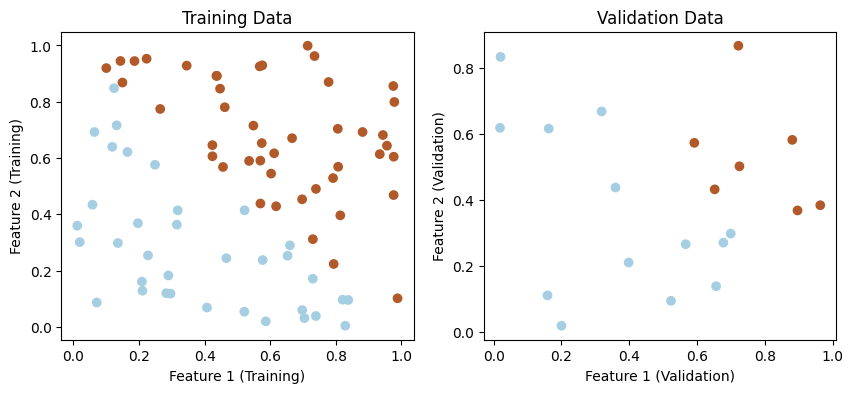

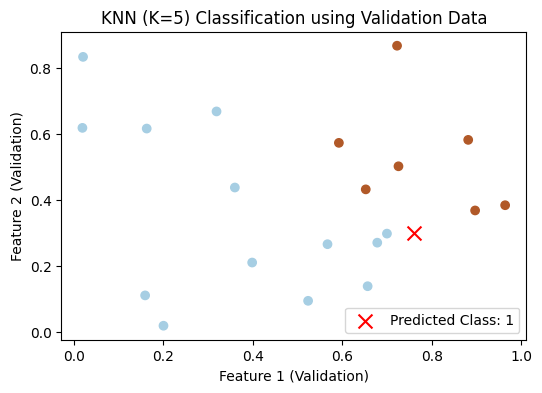

Accuracy on Validation Set: 0.95


In [ ]:
# Split the data into a training set and a validation set
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=58)

# Create a scatter plot of the training data
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)
plt.xlabel("Feature 1 (Training)")
plt.ylabel("Feature 2 (Training)")
plt.title("Training Data")

# Create a scatter plot of the validation data
plt.subplot(1, 2, 2)
plt.scatter(X_valid[:, 0], X_valid[:, 1], c=y_valid, cmap=plt.cm.Paired)
plt.xlabel("Feature 1 (Validation)")
plt.ylabel("Feature 2 (Validation)")
plt.title("Validation Data")

# Create a new data point for prediction
new_data_point = np.array([[0.76, 0.3]])

# Define the number of neighbors (K) for KNN
k = 5

# Create a KNN classifier and fit it to the training data
knn = neighbors.KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Predict the class of the new data point using the trained model
predicted_class = knn.predict(new_data_point)

# Plot the new data point and its predicted class using the validation data
plt.figure(figsize=(6, 4))
plt.scatter(X_valid[:, 0], X_valid[:, 1], c=y_valid, cmap=plt.cm.Paired)
plt.scatter(new_data_point[:, 0], new_data_point[:, 1], marker='x', s=100, c='red', label=f'Predicted Class: {predicted_class[0]}')
plt.xlabel("Feature 1 (Validation)")
plt.ylabel("Feature 2 (Validation)")
plt.title(f'KNN (K={k}) Classification using Validation Data')
plt.legend()

# Validate the performance of the model using the validation data
accuracy = knn.score(X_valid, y_valid)

plt.show()

print(f"Accuracy on Validation Set: {accuracy:.2f}")

# Contour Boundary

Accuracy on the test set: 0.95


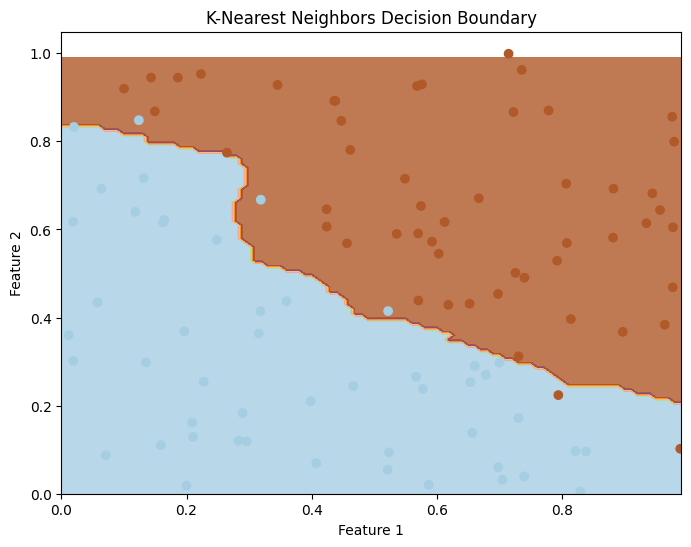

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=58)

# Define the number of neighbors (K) for KNN
k = 5

# Create a KNN classifier with k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# Create a mesh grid to visualize the decision boundary
x_min, x_max = 0, 1.0
y_min, y_max = 0, 1.0
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

# Predict the class labels for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Evaluate the model on the test set
accuracy = knn.score(X_test, y_test)
print(f"Accuracy on the test set: {accuracy:.2f}")

# Plot the decision boundary
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Nearest Neighbors Decision Boundary')
plt.show()



# K-NN using iris dataset (2 features)
We need to import the dataset from sklearn

Class 0: Iris Setosa

Class 1: Iris Versicolour

Class 2: Iris Virginica

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.7000    0.7778    0.7368         9
           2     0.8000    0.7273    0.7619        11

    accuracy                         0.8333        30
   macro avg     0.8333    0.8350    0.8329        30
weighted avg     0.8367    0.8333    0.8338        30

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.6667    0.6667    0.6667         9
           2     0.7273    0.7273    0.7273        11

    accuracy                         0.8000        30
   macro avg     0.7980    0.7980    0.7980        30
weighted avg     0.8000    0.8000    0.8000        30

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        10
           1     0.7500    0.6667    0.7059         9
           2     0.7500    0.8182    0.7826        11

    accuracy        

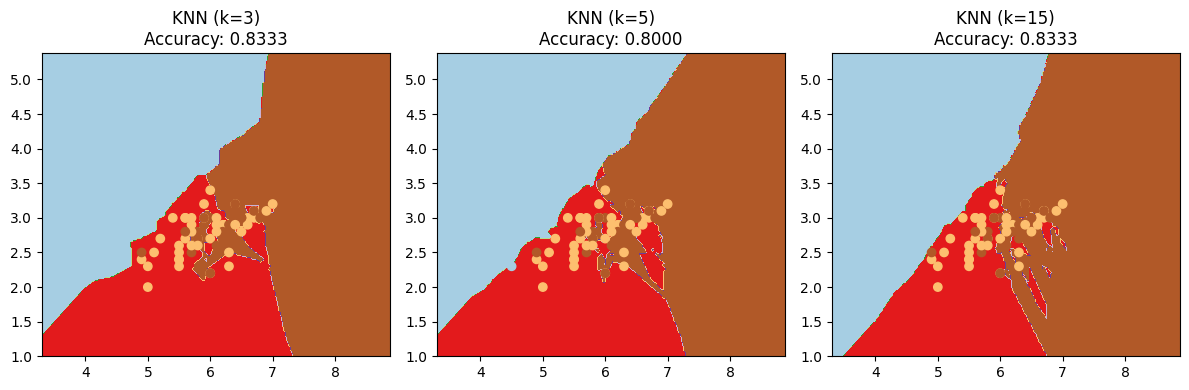

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Load the Iris dataset
iris = datasets.load_iris() # 150 data
X = iris.data[:, :2]  # Only using the first two features for simplicity (plots)
y = iris.target

# Split the data into training and testing sets 120:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values
k_values = [3, 5, 15]

plt.figure(figsize=(12, 4))
for i, k in enumerate(k_values, 1): # return k in: [(1, 1), (2, 5), (3, 20)]
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Plot decision boundary
    plt.subplot(1, len(k_values), i)

    # Create a mesh grid for plotting
    h = 0.02  # Step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predict the class labels for the mesh grid
    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()]) # Z is a flat array of class labels
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    # Plot the training points
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired)

    # Calculate and display the accuracy on the test set
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # knn.score(X_test, y_test) # will yield the same accuracy score

    plt.title(f'KNN (k={k})\nAccuracy: {accuracy:.4f}')
    print(classification_report(y_test, y_pred, digits=4))

plt.tight_layout()
plt.show()


If higher k (number of neighbors) and lower k yield the same results in K-Nearest Neighbors (KNN), it's typically recommended to choose the simpler model, which in this case is the one with the lower k.

Advantages of lower k:
- requires less computation
- more interpretable
- capturing more local patterns

Disadvantages of lower k:
-  a smaller k can capture more local patterns, there's also a risk of overfitting to the noise in the data.

# ROC curve, and AUC

The following k-NN model is based on full features from the iris dataset

In [ ]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc

# Load the Iris dataset, n = 150
iris = load_iris()
X = iris.data  # Features
y = iris.target  # Target labels

print (X)

# Split the data into training (70%) and the combined validation and test set (30%), 105:45
X_train, X_temp, y_train, y_temp = train_test_split(X, y, train_size=0.7, random_state=42)

# Split the combined validation and test set into validation (18%) and test (12%), 27:18
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.4, random_state=42)

# Create a KNN classifier with a specified number of neighbors (e.g., 3)
knn = KNeighborsClassifier(n_neighbors=3)

# Perform k-fold cross-validation on the training set (e.g., 5-fold)
"""
The dataset is divided into k parts.
For each iteration, the model is trained on k-1 parts and tested on the remaining 1 part.
This process is repeated k times, once for each fold as the test set.
The final result is the average of the performance metrics from each of the k iterations.
"""
cv_scores = cross_val_score(knn, X_train, y_train, cv=4)
# Train the KNN classifier on the training set
knn.fit(X_train, y_train)

# Evaluate the model on the validation set
validation_predictions = knn.predict(X_validation)
validation_accuracy = knn.score(X_validation, y_validation)
print(f"Validation Set Accuracy:{validation_accuracy:.2f}")

# Evaluate the model on the test set
test_predictions = knn.predict(X_test)
test_accuracy = knn.score(X_test, y_test)
print(f"Test Set Accuracy: {test_accuracy:.4f}")

# Print cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print(f"Mean Cross-Validation Accuracy: {cv_scores.mean():.4f}" )

# Classification Report for Validation Set
print("Classification Report for Validation Set:")
print(classification_report(y_validation, validation_predictions, target_names=iris.target_names))

# Classification Report for Test Set
print("Classification Report for Test Set:")
print(classification_report(y_test, test_predictions, target_names=iris.target_names))


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

Plot the curve

AUC for class 0: 1.0000
AUC for class 1: 1.0000
AUC for class 2: 1.0000


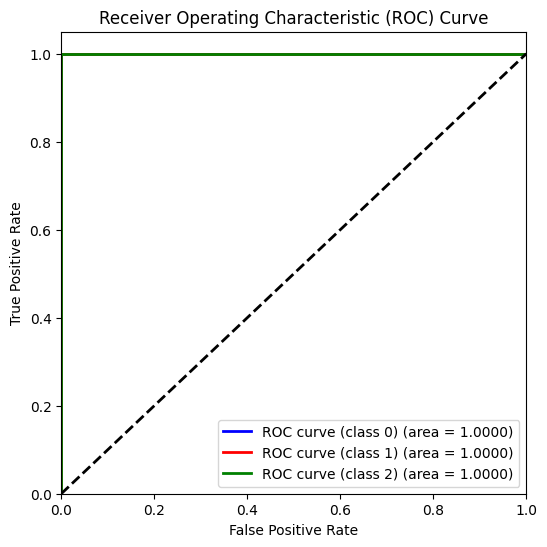

In [ ]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(iris.target_names)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve((y_test == i).astype(int), knn.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(6, 6))
colors = ['blue', 'red', 'green']
for i, color in enumerate(colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label=f'ROC curve (class {i}) (area = {roc_auc[i]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Display AUC values
for i in range(n_classes):
    print(f"AUC for class {i}: {roc_auc[i]:.4f}")

plt.show()